# Exploratory Data Analysis of Dataset + Training of all CNN models

### Including AlexNet, VGG, and both ResNet Models
# Dataset: https://www.kaggle.com/datasets/a2015003713/militaryaircraftdetectiondataset

In [ ]:
# ! pip install -q kaggle
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from PIL import Image
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
from google.colab import drive
drive.mount('/content/mydrive', force_remount=True)


Number of files in each subdirectory in /content/mydrive/MyDrive/DeepLearning/MilitaryObjectDetection/archive/crop are:
F16: 1179 files
P3: 195 files
F18: 1181 files
AV8B: 363 files
RQ4: 279 files
Tu95: 247 files
Tu160: 254 files
B2: 424 files
Vulcan: 340 files
V22: 751 files
SR71: 248 files
E2: 383 files
US2: 578 files
Be200: 255 files
A10: 574 files
C130: 842 files
F4: 535 files
F35: 1000 files
XB70: 151 files
J20: 453 files
Tornado: 389 files
F15: 1147 files
Rafale: 466 files
F14: 457 files
U2: 258 files
A400M: 383 files
F117: 312 files
AG600: 194 files
F22: 562 files
EF2000: 510 files
B1: 546 files
YF23: 131 files
C17: 464 files
C5: 338 files
MQ9: 309 files
Su57: 292 files
C2: 743 files
E7: 128 files
JAS39: 443 files
B52: 453 files
Su34: 310 files
Mirage2000: 364 files
Mig31: 314 files


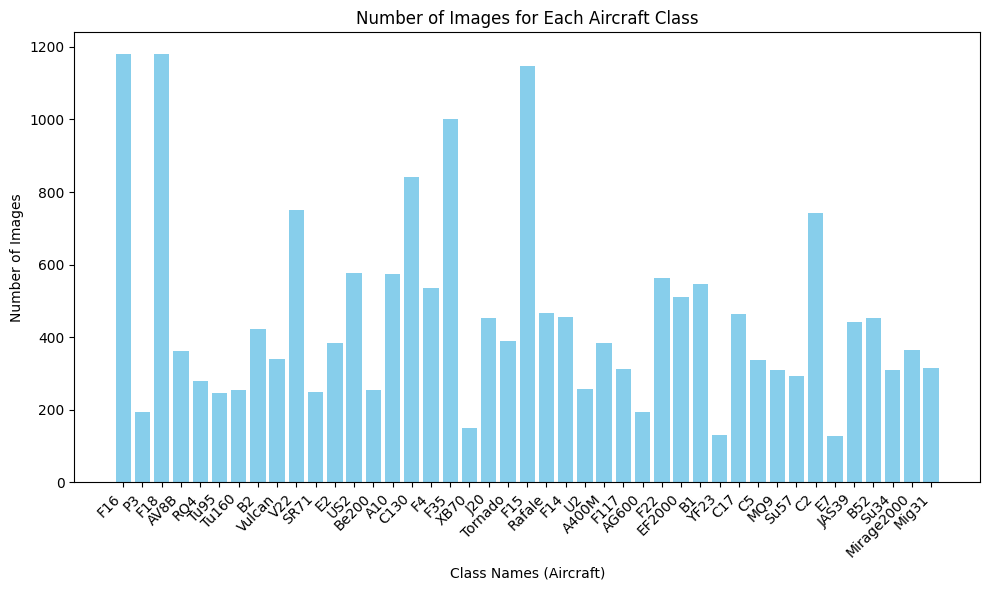

Total Number of Images:  19745


In [ ]:
# Specify the directory for which you want to list subdirectories
directory_path = "/content/mydrive/MyDrive/DeepLearning/MilitaryObjectDetection/archive/crop"
image_count = 0
imgDataset = {"images": [],  "labels": []}


def count_files_in_subdirectories(directory_path):
    subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]
    subdirectory_counts = {}
    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(directory_path, subdirectory)
        files = [f for f in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, f))]
        for file in files:
            imgDataset["images"].append(os.path.join(subdirectory_path, file))
            imgDataset["labels"].append(subdirectory)
        subdirectory_counts[subdirectory] = len(files)
    return subdirectory_counts
subdirectory_counts = count_files_in_subdirectories(directory_path)

print("Number of files in each subdirectory in", directory_path, "are:")
for subdirectory, count in subdirectory_counts.items():
    print(f"{subdirectory}: {count} files")
    image_count += count


subdirectory_counts = count_files_in_subdirectories(directory_path)


subdirectories = list(subdirectory_counts.keys())
file_counts = list(subdirectory_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(subdirectories, file_counts, color='skyblue')
plt.xlabel('Class Names (Aircraft)')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Aircraft Class')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('file_counts_bar_plot.png', dpi=300, bbox_inches='tight')


plt.show()


print("Total Number of Images: ", image_count)

In [ ]:
militaryDf = pd.DataFrame.from_dict(imgDataset)
print(militaryDf.shape)
militaryDf.head()

(39490, 2)


,images,labels
0,/content/mydrive/MyDrive/DeepLearning/Military...,F16
1,/content/mydrive/MyDrive/DeepLearning/Military...,F16
2,/content/mydrive/MyDrive/DeepLearning/Military...,F16
3,/content/mydrive/MyDrive/DeepLearning/Military...,F16
4,/content/mydrive/MyDrive/DeepLearning/Military...,F16


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path)
        label = self.labels[idx]

        if self.transform is not None:
            img = self.transform(img)

        return img, label

from torchvision import transforms
transform_to_tensor = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

label_encoder = LabelEncoder()
militaryDf['labels'] = label_encoder.fit_transform(militaryDf['labels'])

# Split data into train and test sets
train_df, test_df = train_test_split(militaryDf, test_size=0.2, random_state=42)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
train_ds = CustomDataset(train_df['images'], train_df['labels'], transform=transform_to_tensor)
test_ds = CustomDataset(test_df['images'], test_df['labels'], transform=transform_to_tensor)

In [ ]:
# import torch
# import torch.nn as nn

# # Define a simple neural network
# class SimpleNN(nn.Module):
#     def __init__(self):
#         super(SimpleNN, self).__init__()
#         self.fc1 = nn.Linear(10, 20)
#         self.fc2 = nn.Linear(20, 1)
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# # Instantiate the neural network


# # Define some dummy input
# dummy_input = torch.randn(5, 10)  # Batch size of 5, input size of 10

# # Forward pass to initialize weights and biases
# model = models.resnet50(pretrained=True)
# name = 'resnet50'
# epoch = 1
# # Save the model
# torch.save(model.state_dict(), f"/content/mydrive/MyDrive/DeepLearning/MilitaryObjectDetection/models/{name}_{epoch}.pth")


In [ ]:
# Check if CUDA (GPU support) is available, and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32

# Create DataLoader instances
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size)

# Function to freeze layers except the last layer
def freeze_layers(model):
    for param in model.parameters():
        param.requires_grad = False

# Function to create models and modify them for transfer learning
def get_model(model_name):
    if model_name == 'AlexNet':
        model = models.alexnet(pretrained=True)
        freeze_layers(model)
        num_features = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_features, 47)
    elif model_name == 'VGG-16':
        model = models.vgg16(pretrained=True)
        freeze_layers(model)
        num_features = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_features, 47)
    elif model_name == 'ResNet50':
        model = models.resnet50(pretrained=True)
        freeze_layers(model)
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features, 47)
    elif model_name == 'ResNet50FPN':
        model = models.resnet50(pretrained=True)
        freeze_layers(model)
        # Modify ResNet50 to use FPN (Feature Pyramid Network)
        # Example: Replace the classifier with custom layers for FPN
        # You can further customize this according to your requirement
        # For simplicity, let's replace the classifier with one linear layer
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features, 47)
    else:
        raise ValueError("Model not supported")

    return model

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    print(len(train_loader), len(test_loader))
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            epoch_loss = running_loss / len(train_loader.dataset)
            print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}")

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}")


        print("Path:")
        Path = f"/content/mydrive/MyDrive/DeepLearning/MilitaryObjectDetection/models/{model_name}_{epoch}.pth"
        print(Path)
        torch.save(model.state_dict(), f"/content/mydrive/MyDrive/DeepLearning/MilitaryObjectDetection/models/{model_name}_{epoch}.pth")
        print("Model Was Saved")


    print('Finished Training')
    model.eval()

    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on test set: {accuracy:.2f}%")

    return model

# Define model names
model_names = ['ResNet50', 'ResNet50FPN','AlexNet', 'VGG-16']

# Train models
for model_name in model_names:
    model = get_model(model_name)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    print(f"Training {model_name}...")
    mod = train_model(model, train_loader, test_loader, criterion, optimizer)
    try:
      print("Path:")
      Path = f"/content/mydrive/MyDrive/DeepLearning/MilitaryObjectDetection/models/{model_name}/{model_name}_20.pth"
      print(Path)
      torch.save(mod.state_dict(), Path)
      print("Model Was Saved")
    except:
      Path = f"/content/mydrive/MyDrive/DeepLearning/MilitaryObjectDetection/models/{model_name}/{model_name}_20.pth"
      print(Path)
      print("Error saving model")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Streaming output truncated to the last 5000 lines.
Epoch [15/20] - Loss: 0.9769
Epoch [15/20] - Loss: 0.9778
Epoch [15/20] - Loss: 0.9787
Epoch [15/20] - Loss: 0.9796
Epoch [15/20] - Loss: 0.9810
Epoch [15/20] - Loss: 0.9821
Epoch [15/20] - Loss: 0.9831
Epoch [15/20] - Loss: 0.9840
Epoch [15/20] - Loss: 0.9850
Epoch [15/20] - Loss: 0.9858
Epoch [15/20] - Loss: 0.9869
Epoch [15/20] - Loss: 0.9878
Epoch [15/20] - Loss: 0.9888
Epoch [15/20] - Loss: 0.9898
Epoch [15/20] - Loss: 0.9908
Epoch [15/20] - Loss: 0.9918
Epoch [15/20] - Loss: 0.9928
Epoch [15/20] - Loss: 0.9936
Epoch [15/20] - Loss: 0.9945
Epoch [15/20] - Loss: 0.9953
Epoch [15/20] - Loss: 0.9967
Epoch [15/20] - Loss: 0.9973
Epoch [15/20] - Loss: 0.9980
Epoch [15/20] - Loss: 0.9987
Epoch [15/20] - Loss: 1.0000
Epoch [15/20] - Loss: 1.0009
Epoch [15/20] - Loss: 1.0021
Epoch [15/20] - Loss: 1.0034
Epoch [15/20] - Loss: 1.0042
Epoch [15/20] - Loss: 1.0046
Epoch [15/20] - Loss: 1.0046
Path:
/content/mydrive/MyDrive/DeepLearning/Milita

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:08<00:00, 27.7MB/s]


Streaming output truncated to the last 5000 lines.
Epoch [15/20] - Loss: 1.6875
Epoch [15/20] - Loss: 1.6892
Epoch [15/20] - Loss: 1.6909
Epoch [15/20] - Loss: 1.6929
Epoch [15/20] - Loss: 1.6947
Epoch [15/20] - Loss: 1.6968
Epoch [15/20] - Loss: 1.6989
Epoch [15/20] - Loss: 1.7011
Epoch [15/20] - Loss: 1.7029
Epoch [15/20] - Loss: 1.7045
Epoch [15/20] - Loss: 1.7061
Epoch [15/20] - Loss: 1.7077
Epoch [15/20] - Loss: 1.7094
Epoch [15/20] - Loss: 1.7114
Epoch [15/20] - Loss: 1.7140
Epoch [15/20] - Loss: 1.7158
Epoch [15/20] - Loss: 1.7183
Epoch [15/20] - Loss: 1.7210
Epoch [15/20] - Loss: 1.7228
Epoch [15/20] - Loss: 1.7248
Epoch [15/20] - Loss: 1.7266
Epoch [15/20] - Loss: 1.7289
Epoch [15/20] - Loss: 1.7312
Epoch [15/20] - Loss: 1.7330
Epoch [15/20] - Loss: 1.7356
Epoch [15/20] - Loss: 1.7372
Epoch [15/20] - Loss: 1.7384
Epoch [15/20] - Loss: 1.7411
Epoch [15/20] - Loss: 1.7433
Epoch [15/20] - Loss: 1.7436
Epoch [15/20] - Loss: 1.7436
Path:
/content/mydrive/MyDrive/DeepLearning/Milita

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:17<00:00, 31.4MB/s]


Streaming output truncated to the last 5000 lines.
Epoch [15/20] - Loss: 2.1369
Epoch [15/20] - Loss: 2.1393
Epoch [15/20] - Loss: 2.1415
Epoch [15/20] - Loss: 2.1436
Epoch [15/20] - Loss: 2.1456
Epoch [15/20] - Loss: 2.1473
Epoch [15/20] - Loss: 2.1497
Epoch [15/20] - Loss: 2.1519
Epoch [15/20] - Loss: 2.1544
Epoch [15/20] - Loss: 2.1563
Epoch [15/20] - Loss: 2.1581
Epoch [15/20] - Loss: 2.1603
Epoch [15/20] - Loss: 2.1632
Epoch [15/20] - Loss: 2.1651
Epoch [15/20] - Loss: 2.1671
Epoch [15/20] - Loss: 2.1700
Epoch [15/20] - Loss: 2.1721
Epoch [15/20] - Loss: 2.1741
Epoch [15/20] - Loss: 2.1762
Epoch [15/20] - Loss: 2.1785
Epoch [15/20] - Loss: 2.1812
Epoch [15/20] - Loss: 2.1829
Epoch [15/20] - Loss: 2.1852
Epoch [15/20] - Loss: 2.1873
Epoch [15/20] - Loss: 2.1891
Epoch [15/20] - Loss: 2.1911
Epoch [15/20] - Loss: 2.1935
Epoch [15/20] - Loss: 2.1964
Epoch [15/20] - Loss: 2.1989
Epoch [15/20] - Loss: 2.1992
Epoch [15/20] - Loss: 2.1992
Path:
/content/mydrive/MyDrive/DeepLearning/Milita